In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("../data/imageDataSet.csv")

In [22]:
df.head()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23460,23484,23739,25230,25275,25742,26254,26556,27068,Target
0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,54.366783,0.0,0.0,...,97.608917,14.459715,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.000000,0.0,15.3224,0.000000,0.0,0.000000,0.0,0.0,...,24.481390,0.000000,2.560059,0.0,23.686781,0.0,0.0,0.0,0.0,1
2,59.974754,0.0,3.246423,0.0,0.0000,0.000000,0.0,3.179555,0.0,0.0,...,34.729649,26.950748,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,3.362229,0.0,0.000000,0.0,0.0000,5.895135,0.0,26.151339,0.0,0.0,...,65.901802,19.239208,0.000000,0.0,4.102757,0.0,0.0,0.0,0.0,1
4,19.702305,0.0,0.000000,0.0,0.0000,11.719869,0.0,0.000000,0.0,0.0,...,6.159858,23.088205,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10953 entries, 0 to 10952
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1109    10953 non-null  float64
 1   1111    10953 non-null  float64
 2   1621    10953 non-null  float64
 3   1623    10953 non-null  float64
 4   2133    10953 non-null  float64
 5   4693    10953 non-null  float64
 6   4695    10953 non-null  float64
 7   5193    10953 non-null  float64
 8   5207    10953 non-null  float64
 9   5319    10953 non-null  float64
 10  8683    10953 non-null  float64
 11  8777    10953 non-null  float64
 12  9170    10953 non-null  float64
 13  9200    10953 non-null  float64
 14  9289    10953 non-null  float64
 15  9392    10953 non-null  float64
 16  9636    10953 non-null  float64
 17  9692    10953 non-null  float64
 18  10148   10953 non-null  float64
 19  10204   10953 non-null  float64
 20  10660   10953 non-null  float64
 21  10825   10953 non-null  float64
 22

In [26]:
y = df['Target']
X = df.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [27]:
X_train.describe()

,1109,1111,1621,1623,2133,4693,4695,5193,5207,5319,...,23004,23460,23484,23739,25230,25275,25742,26254,26556,27068
count,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,...,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000
mean,3.913433,3.437082,4.120637,5.602455,4.014745,4.435390,3.555729,9.787619,5.537766,4.744385,...,15.395498,23.227447,12.567876,7.267507,7.020781,7.929773,8.622113,7.373636,11.679915,11.410799
std,12.070661,12.682634,12.458132,17.998788,12.379835,12.667315,12.675511,19.805904,17.552769,14.991786,...,39.934534,40.064319,21.888965,16.772263,21.053498,18.469846,23.595269,22.044238,21.336568,21.340828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.331020,0.000000,0.000000,...,2.280666,32.786804,18.064371,4.355811,0.000000,5.037994,0.000000,0.000000,16.174051,14.995335
max,127.861900,116.553925,105.633881,136.821945,110.275536,118.405060,177.059387,145.854446,177.740250,147.352890,...,392.822083,329.885895,166.452866,166.121902,205.357239,174.718369,189.129990,213.697021,187.903137,189.659073


In [28]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('LR', LogisticRegression(random_state=42))])


# source: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

In [29]:
hyperparameters = {'LR__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'LR__solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
                   'LR__multi_class': ['auto','ovr','multinomial'],
                   'LR__dual': [True, False],
                   'LR__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'LR__max_iter': np.arange(100, 500, 20).tolist()}

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

gscv  = GridSearchCV(pipeline, 
                     param_grid=hyperparameters, 
                     cv=kfold, 
                     scoring='accuracy',
                     n_jobs=-1)

In [30]:
import json

star = time.time()
gscv_result = gscv.fit(X_train, y_train)
end = time.time()

print("Demorou apenas: {}".format((end-star)/60))
print("GridSearchCV Best: ", gscv_result.best_score_)
print("Parameters:\n", json.dumps(gscv_result.best_params_, indent=2))

Demorou apenas: 38.918173285325366
GridSearchCV Best:  0.8817002052200567
Parameters:
 {
  "LR__C": 10,
  "LR__dual": true,
  "LR__max_iter": 100,
  "LR__multi_class": "auto",
  "LR__penalty": "l2",
  "LR__solver": "liblinear"
}


In [31]:
y_pred = gscv.predict(X_test)

print(y_pred)

[1 0 0 ... 1 0 0]


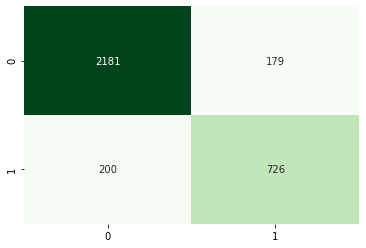

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score

mae    = mean_absolute_error(y_test, y_pred)
mse    = mean_squared_error(y_test, y_pred)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
r_sqrd = r2_score(y_test, y_pred)

print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Mean Absolute Error   : 0.12
Mean Squared Error    : 0.12
Root Mean Square Error: 0.34
R-Squared             : 0.43
